In [1]:
# 导入相关的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import missingno as msno
from tqdm import tqdm
from time import time
import lightgbm as lgb
%matplotlib inline

In [2]:
#导入训练集
train_datas = pd.read_csv('train.csv',parse_dates=[2])
train_datas.head()

G:\AIAIAI\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
#导入测试集
test_datas = pd.read_csv('test.csv',parse_dates=[3])
test_datas.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [4]:
#导入store集
store_datas = pd.read_csv('store.csv')
store_datas.head().append(store_datas.tail())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [5]:
#初步观察并了解数据集
ProfileReport(train_datas)

Number of variables,9
Number of observations,1017209
Total Missing (%),0.0%
Total size in memory,69.8 MiB
Average record size in memory,72.0 B
Numeric,4
Categorical,1
Boolean,3
Date,1
Text (Unique),0
Rejected,0


In [6]:
ProfileReport(test_datas)

Number of variables,8
Number of observations,41088
Total Missing (%),0.0%
Total size in memory,2.5 MiB
Average record size in memory,64.0 B
Numeric,4
Categorical,1
Boolean,2
Date,1
Text (Unique),0
Rejected,0


In [7]:
ProfileReport(store_datas)

Number of variables,10
Number of observations,1115
Total Missing (%),21.0%
Total size in memory,87.2 KiB
Average record size in memory,80.1 B
Numeric,6
Categorical,3
Boolean,1
Date,0
Text (Unique),0
Rejected,0


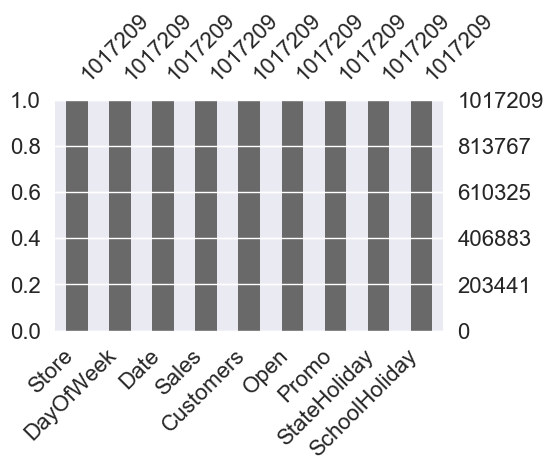

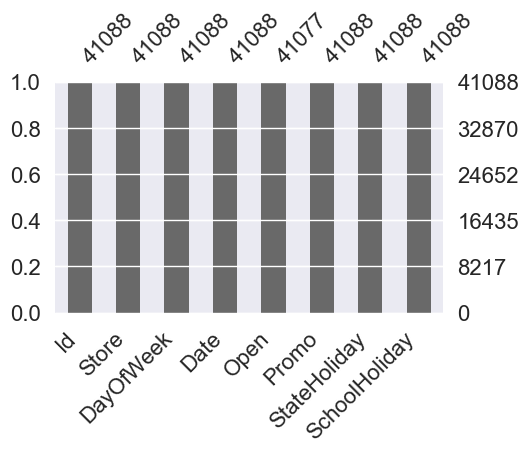

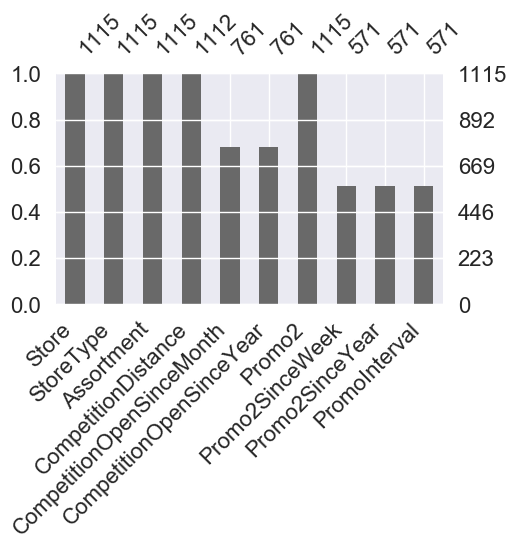

In [8]:
#观察训练集的缺失值情况
msno.bar(train_datas,figsize=(5,3))
#观察测试集的缺失值情况
msno.bar(test_datas,figsize=(5,3))
#观察store集的缺失值情况
msno.bar(store_datas,figsize=(5,3))

In [9]:
#观察测试集中的缺失值
test_datas[test_datas.isnull().values==True]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [10]:
#测试集缺失值填充
test_datas = test_datas.fillna(1)
print(test_datas.isnull().sum())

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [11]:
#store缺失值填充
store_datas['CompetitionDistance'] = store_datas['CompetitionDistance'].fillna(store_datas['CompetitionDistance'].mean())
store_datas['CompetitionOpenSinceMonth'] = store_datas['CompetitionOpenSinceMonth'].fillna(method='pad')
store_datas['CompetitionOpenSinceYear'] = store_datas['CompetitionOpenSinceYear'].fillna(method='pad')
store_datas = store_datas.fillna(0)
store_datas.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [12]:
#把train_datas、test_datas和store_datas合并，构成新的训练集和测试集
train_data = pd.merge(train_datas, store_datas, on='Store')
test_data = pd.merge(test_datas, store_datas, on='Store')
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [13]:
#留出最近的6周数据作为验证集
train_data = train_data.sort_values(['Date'],ascending = False)
valid_data = train_data[:6*7*1115]
train_data = train_data[6*7*1115:]
train_data.sort_values(by='Store', inplace=True)
valid_data.sort_values(by='Store', inplace=True)

In [14]:
#因为销售额为0的记录不计入评分，所以只采用店铺为开，且销售额大于0的数据进行训练
valid_data = valid_data[(valid_data["Open"] != 0)&(valid_data["Sales"] > 0)]
train_data = train_data[(train_data["Open"] != 0)&(train_data["Sales"] > 0)]

In [15]:
#特征处理与转化，定义特征处理函数

def features_create(data):
    #将存在其他字符表示分类的特征转化为数字
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    #将时间特征进行拆分和转化，并加入'WeekOfYear'特征
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    #新增'CompetitionOpen'和'PromoOpen'特征,计算某天某店铺的竞争对手已营业时间和店铺促销已开展时间，用月为单位表示
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) + (data.Month - data.CompetitionOpenSinceMonth)
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) + (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    data['PromoOpen'][data['Promo2']==0] = 0
    
    #将'PromoInterval'特征转化为'IsPromoMonth'特征,表示某天某店铺是否处于促销月，1表示是，0表示否
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for ProMonth in data.PromoInterval.unique():
        if ProMonth != '':
            for month in ProMonth.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == ProMonth) & (data.PromoOpen != 0), 'IsPromoMonth'] = 1
    return data

In [16]:
#对训练集、验证集、测试集数据进行特征转化
features_create(train_data)
features_create(valid_data)
features_create(test_data)
print('Feature engineering finished')

G:\AIAIAI\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Feature engineering finished


In [17]:
#删掉训练集和验证集中不需要的特征
train_data.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)
valid_data.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)

#删掉测试集中对应的特征与训练集保持一致
x_test = test_data.drop(['Id','Date','Open','PromoInterval','monthStr'],axis = 1)

In [18]:
#拆分特征与标签，并将标签取对数处理
x_train = train_data.drop(['Sales'],axis=1 )
y_train = train_data.Sales
x_valid = valid_data.drop(['Sales'],axis=1 )
y_valid = valid_data.Sales

In [19]:
#定义评价函数rmspe

def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))
def rmspe_lg(yhat, y):
    return "rmspe", rmspe(y,yhat), False

In [20]:
#设置模型参数

clf = lgb.LGBMRegressor(
    boosting_type="gbdt",
    num_leaves=31,
    reg_alpha=0,
    reg_lambda=0,
    max_depth=-1,
    n_estimators=6000,
    objective='regression',
    subsample=0.8,            # 在不进行重采样的情况下随机选择部分数据
    colsample_bytree=0.8,     # 每次迭代中随机选择部分特征
    subsample_freq=1,         # bagging 的频率, 0 意味着禁用 bagging. k 意味着每 k 次迭代执行bagging（subsample）
    learning_rate=0.1,
    random_state=49
    )

In [21]:
#训练模型
start = time()
clf.fit(x_train, y_train,eval_set=[(x_train, y_train),(x_valid, y_valid)], eval_metric=rmspe_lg, early_stopping_rounds=500,
        categorical_feature=['Store','DayOfWeek','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                             'CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','Year',
                             'Month','Day','WeekOfYear','IsPromoMonth'])
end = time()

G:\AIAIAI\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Assortment', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Day', 'DayOfWeek', 'IsPromoMonth', 'Month', 'Promo', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'SchoolHoliday', 'StateHoliday', 'Store', 'StoreType', 'WeekOfYear', 'Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
G:\AIAIAI\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Assortment', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Day', 'DayOfWeek', 'IsPromoMonth', 'Month', 'Promo', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'SchoolHoliday', 'StateHoliday', 'Store', 'StoreType', 'WeekOfYear', 'Year']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	training's l2: 8.39579e+06	training's rmspe: 0.401086	valid_1's l2: 8.11732e+06	valid_1's rmspe: 0.395165
Training until validation scores don't improve for 500 rounds.
[2]	training's l2: 7.38727e+06	training's rmspe: 0.368417	valid_1's l2: 7.13865e+06	valid_1's rmspe: 0.363477
[3]	training's l2: 6.55542e+06	training's rmspe: 0.343786	valid_1's l2: 6.32204e+06	valid_1's rmspe: 0.339513
[4]	training's l2: 5.84665e+06	training's rmspe: 0.323509	valid_1's l2: 5.63501e+06	valid_1's rmspe: 0.319622
[5]	training's l2: 5.29031e+06	training's rmspe: 0.30779	valid_1's l2: 5.08472e+06	valid_1's rmspe: 0.303863
[6]	training's l2: 5.0602e+06	training's rmspe: 0.300444	valid_1's l2: 4.84016e+06	valid_1's rmspe: 0.296058
[7]	training's l2: 4.62857e+06	training's rmspe: 0.288136	valid_1's l2: 4.40789e+06	valid_1's rmspe: 0.283404
[8]	training's l2: 4.25053e+06	training's rmspe: 0.277238	valid_1's l2: 4.05181e+06	valid_1's rmspe: 0.273273
[9]	training's l2: 3.92178e+06	training's rmspe: 0.267914	v

[151]	training's l2: 738830	training's rmspe: 0.125021	valid_1's l2: 1.00797e+06	valid_1's rmspe: 0.142355
[152]	training's l2: 737710	training's rmspe: 0.124913	valid_1's l2: 1.00706e+06	valid_1's rmspe: 0.142272
[153]	training's l2: 736470	training's rmspe: 0.124824	valid_1's l2: 1.00599e+06	valid_1's rmspe: 0.142167
[154]	training's l2: 735521	training's rmspe: 0.124775	valid_1's l2: 1.00535e+06	valid_1's rmspe: 0.142109
[155]	training's l2: 734715	training's rmspe: 0.124722	valid_1's l2: 1.00502e+06	valid_1's rmspe: 0.142074
[156]	training's l2: 733849	training's rmspe: 0.124685	valid_1's l2: 1.00452e+06	valid_1's rmspe: 0.142047
[157]	training's l2: 732664	training's rmspe: 0.124533	valid_1's l2: 1.00301e+06	valid_1's rmspe: 0.141924
[158]	training's l2: 731430	training's rmspe: 0.124458	valid_1's l2: 1.00209e+06	valid_1's rmspe: 0.141859
[159]	training's l2: 730582	training's rmspe: 0.12438	valid_1's l2: 1.001e+06	valid_1's rmspe: 0.141758
[160]	training's l2: 728226	training's r

[310]	training's l2: 605262	training's rmspe: 0.115452	valid_1's l2: 894848	valid_1's rmspe: 0.133755
[311]	training's l2: 604746	training's rmspe: 0.11538	valid_1's l2: 894711	valid_1's rmspe: 0.133746
[312]	training's l2: 603166	training's rmspe: 0.115179	valid_1's l2: 893278	valid_1's rmspe: 0.133598
[313]	training's l2: 602764	training's rmspe: 0.115134	valid_1's l2: 893024	valid_1's rmspe: 0.133578
[314]	training's l2: 602483	training's rmspe: 0.115111	valid_1's l2: 892876	valid_1's rmspe: 0.133573
[315]	training's l2: 602048	training's rmspe: 0.115095	valid_1's l2: 892825	valid_1's rmspe: 0.13357
[316]	training's l2: 601640	training's rmspe: 0.115065	valid_1's l2: 892864	valid_1's rmspe: 0.133568
[317]	training's l2: 601134	training's rmspe: 0.115014	valid_1's l2: 892386	valid_1's rmspe: 0.133518
[318]	training's l2: 600506	training's rmspe: 0.114955	valid_1's l2: 891864	valid_1's rmspe: 0.133388
[319]	training's l2: 600182	training's rmspe: 0.114934	valid_1's l2: 891792	valid_1'

[470]	training's l2: 537295	training's rmspe: 0.109265	valid_1's l2: 847329	valid_1's rmspe: 0.130394
[471]	training's l2: 536986	training's rmspe: 0.109239	valid_1's l2: 847253	valid_1's rmspe: 0.130391
[472]	training's l2: 536734	training's rmspe: 0.10921	valid_1's l2: 846829	valid_1's rmspe: 0.130367
[473]	training's l2: 536544	training's rmspe: 0.109193	valid_1's l2: 846799	valid_1's rmspe: 0.130357
[474]	training's l2: 536014	training's rmspe: 0.109165	valid_1's l2: 845270	valid_1's rmspe: 0.130285
[475]	training's l2: 535630	training's rmspe: 0.109148	valid_1's l2: 845107	valid_1's rmspe: 0.13029
[476]	training's l2: 534945	training's rmspe: 0.109106	valid_1's l2: 844548	valid_1's rmspe: 0.130265
[477]	training's l2: 534726	training's rmspe: 0.109086	valid_1's l2: 844334	valid_1's rmspe: 0.130237
[478]	training's l2: 534538	training's rmspe: 0.109077	valid_1's l2: 844205	valid_1's rmspe: 0.13024
[479]	training's l2: 534243	training's rmspe: 0.109056	valid_1's l2: 844177	valid_1's

[630]	training's l2: 493111	training's rmspe: 0.10531	valid_1's l2: 820969	valid_1's rmspe: 0.128822
[631]	training's l2: 492893	training's rmspe: 0.105283	valid_1's l2: 820634	valid_1's rmspe: 0.128781
[632]	training's l2: 492679	training's rmspe: 0.105265	valid_1's l2: 820481	valid_1's rmspe: 0.128774
[633]	training's l2: 492492	training's rmspe: 0.105245	valid_1's l2: 820517	valid_1's rmspe: 0.128785
[634]	training's l2: 492310	training's rmspe: 0.105227	valid_1's l2: 820472	valid_1's rmspe: 0.128782
[635]	training's l2: 492122	training's rmspe: 0.105206	valid_1's l2: 820480	valid_1's rmspe: 0.128783
[636]	training's l2: 491953	training's rmspe: 0.105179	valid_1's l2: 820652	valid_1's rmspe: 0.12879
[637]	training's l2: 491809	training's rmspe: 0.105163	valid_1's l2: 820573	valid_1's rmspe: 0.128788
[638]	training's l2: 491658	training's rmspe: 0.105149	valid_1's l2: 820533	valid_1's rmspe: 0.128784
[639]	training's l2: 491474	training's rmspe: 0.105131	valid_1's l2: 820518	valid_1'

[790]	training's l2: 460698	training's rmspe: 0.102115	valid_1's l2: 805138	valid_1's rmspe: 0.127569
[791]	training's l2: 460538	training's rmspe: 0.102107	valid_1's l2: 804952	valid_1's rmspe: 0.12756
[792]	training's l2: 460392	training's rmspe: 0.102092	valid_1's l2: 804903	valid_1's rmspe: 0.127555
[793]	training's l2: 460230	training's rmspe: 0.102082	valid_1's l2: 804691	valid_1's rmspe: 0.127541
[794]	training's l2: 460038	training's rmspe: 0.102046	valid_1's l2: 804591	valid_1's rmspe: 0.127521
[795]	training's l2: 459902	training's rmspe: 0.102031	valid_1's l2: 804539	valid_1's rmspe: 0.127523
[796]	training's l2: 459791	training's rmspe: 0.102022	valid_1's l2: 804551	valid_1's rmspe: 0.127526
[797]	training's l2: 459554	training's rmspe: 0.102006	valid_1's l2: 804564	valid_1's rmspe: 0.127528
[798]	training's l2: 459424	training's rmspe: 0.101988	valid_1's l2: 804586	valid_1's rmspe: 0.127532
[799]	training's l2: 459304	training's rmspe: 0.10198	valid_1's l2: 804496	valid_1'

[950]	training's l2: 435831	training's rmspe: 0.0997567	valid_1's l2: 791931	valid_1's rmspe: 0.126586
[951]	training's l2: 435702	training's rmspe: 0.0997425	valid_1's l2: 791807	valid_1's rmspe: 0.126581
[952]	training's l2: 435567	training's rmspe: 0.0997274	valid_1's l2: 791811	valid_1's rmspe: 0.126578
[953]	training's l2: 435485	training's rmspe: 0.099716	valid_1's l2: 791780	valid_1's rmspe: 0.126579
[954]	training's l2: 435384	training's rmspe: 0.0997061	valid_1's l2: 791656	valid_1's rmspe: 0.126574
[955]	training's l2: 435254	training's rmspe: 0.0996893	valid_1's l2: 791412	valid_1's rmspe: 0.126528
[956]	training's l2: 435138	training's rmspe: 0.0996789	valid_1's l2: 791365	valid_1's rmspe: 0.126525
[957]	training's l2: 435014	training's rmspe: 0.0996689	valid_1's l2: 791393	valid_1's rmspe: 0.126529
[958]	training's l2: 434880	training's rmspe: 0.0996582	valid_1's l2: 791613	valid_1's rmspe: 0.126569
[959]	training's l2: 434778	training's rmspe: 0.0996411	valid_1's l2: 7915

[1107]	training's l2: 416623	training's rmspe: 0.0978651	valid_1's l2: 780473	valid_1's rmspe: 0.125631
[1108]	training's l2: 416504	training's rmspe: 0.0978497	valid_1's l2: 780518	valid_1's rmspe: 0.125624
[1109]	training's l2: 416407	training's rmspe: 0.0978488	valid_1's l2: 780447	valid_1's rmspe: 0.125615
[1110]	training's l2: 416285	training's rmspe: 0.097841	valid_1's l2: 780371	valid_1's rmspe: 0.125612
[1111]	training's l2: 416198	training's rmspe: 0.0978339	valid_1's l2: 780289	valid_1's rmspe: 0.12561
[1112]	training's l2: 416117	training's rmspe: 0.0978289	valid_1's l2: 780296	valid_1's rmspe: 0.125611
[1113]	training's l2: 415873	training's rmspe: 0.0977994	valid_1's l2: 780038	valid_1's rmspe: 0.125574
[1114]	training's l2: 415681	training's rmspe: 0.0977816	valid_1's l2: 780020	valid_1's rmspe: 0.125572
[1115]	training's l2: 415561	training's rmspe: 0.0977719	valid_1's l2: 779992	valid_1's rmspe: 0.125575
[1116]	training's l2: 415410	training's rmspe: 0.0977569	valid_1's

[1186]	training's l2: 406944	training's rmspe: 0.0968597	valid_1's l2: 777846	valid_1's rmspe: 0.125431
[1187]	training's l2: 406798	training's rmspe: 0.0968334	valid_1's l2: 777668	valid_1's rmspe: 0.125411
[1188]	training's l2: 406713	training's rmspe: 0.0968279	valid_1's l2: 777601	valid_1's rmspe: 0.125404
[1189]	training's l2: 406497	training's rmspe: 0.0967853	valid_1's l2: 777520	valid_1's rmspe: 0.125401
[1190]	training's l2: 406346	training's rmspe: 0.0967646	valid_1's l2: 777412	valid_1's rmspe: 0.125385
[1191]	training's l2: 406264	training's rmspe: 0.0967558	valid_1's l2: 777256	valid_1's rmspe: 0.12538
[1192]	training's l2: 406156	training's rmspe: 0.0967456	valid_1's l2: 777218	valid_1's rmspe: 0.125373
[1193]	training's l2: 406009	training's rmspe: 0.0967332	valid_1's l2: 777300	valid_1's rmspe: 0.12538
[1194]	training's l2: 405927	training's rmspe: 0.0967271	valid_1's l2: 777143	valid_1's rmspe: 0.125383
[1195]	training's l2: 405783	training's rmspe: 0.0967063	valid_1's

[1342]	training's l2: 389902	training's rmspe: 0.094975	valid_1's l2: 770330	valid_1's rmspe: 0.124713
[1343]	training's l2: 389816	training's rmspe: 0.094959	valid_1's l2: 770380	valid_1's rmspe: 0.12472
[1344]	training's l2: 389714	training's rmspe: 0.0949489	valid_1's l2: 770337	valid_1's rmspe: 0.124721
[1345]	training's l2: 389623	training's rmspe: 0.0949373	valid_1's l2: 770226	valid_1's rmspe: 0.124714
[1346]	training's l2: 389562	training's rmspe: 0.0949331	valid_1's l2: 770205	valid_1's rmspe: 0.12471
[1347]	training's l2: 389487	training's rmspe: 0.0949211	valid_1's l2: 770124	valid_1's rmspe: 0.124706
[1348]	training's l2: 389401	training's rmspe: 0.0949169	valid_1's l2: 770125	valid_1's rmspe: 0.124708
[1349]	training's l2: 389332	training's rmspe: 0.0949111	valid_1's l2: 770095	valid_1's rmspe: 0.124704
[1350]	training's l2: 389256	training's rmspe: 0.0949009	valid_1's l2: 770024	valid_1's rmspe: 0.124695
[1351]	training's l2: 389181	training's rmspe: 0.0948894	valid_1's l

[1498]	training's l2: 375385	training's rmspe: 0.0934187	valid_1's l2: 763432	valid_1's rmspe: 0.124265
[1499]	training's l2: 375323	training's rmspe: 0.0934125	valid_1's l2: 763421	valid_1's rmspe: 0.124259
[1500]	training's l2: 375234	training's rmspe: 0.0934045	valid_1's l2: 763406	valid_1's rmspe: 0.12426
[1501]	training's l2: 375153	training's rmspe: 0.0934062	valid_1's l2: 763472	valid_1's rmspe: 0.124262
[1502]	training's l2: 375081	training's rmspe: 0.0933979	valid_1's l2: 763399	valid_1's rmspe: 0.124256
[1503]	training's l2: 375014	training's rmspe: 0.0933922	valid_1's l2: 763410	valid_1's rmspe: 0.124253
[1504]	training's l2: 374913	training's rmspe: 0.0933867	valid_1's l2: 763406	valid_1's rmspe: 0.124252
[1505]	training's l2: 374847	training's rmspe: 0.0933801	valid_1's l2: 763356	valid_1's rmspe: 0.12424
[1506]	training's l2: 374785	training's rmspe: 0.0933712	valid_1's l2: 763197	valid_1's rmspe: 0.124226
[1507]	training's l2: 374711	training's rmspe: 0.0933649	valid_1's

[1654]	training's l2: 363365	training's rmspe: 0.0920738	valid_1's l2: 759938	valid_1's rmspe: 0.12396
[1655]	training's l2: 363277	training's rmspe: 0.092068	valid_1's l2: 760012	valid_1's rmspe: 0.123969
[1656]	training's l2: 363199	training's rmspe: 0.0920569	valid_1's l2: 759934	valid_1's rmspe: 0.123958
[1657]	training's l2: 363140	training's rmspe: 0.0920499	valid_1's l2: 759952	valid_1's rmspe: 0.123957
[1658]	training's l2: 363078	training's rmspe: 0.092047	valid_1's l2: 759979	valid_1's rmspe: 0.123964
[1659]	training's l2: 363021	training's rmspe: 0.0920432	valid_1's l2: 760041	valid_1's rmspe: 0.123964
[1660]	training's l2: 362959	training's rmspe: 0.0920355	valid_1's l2: 760030	valid_1's rmspe: 0.123964
[1661]	training's l2: 362838	training's rmspe: 0.0920245	valid_1's l2: 759997	valid_1's rmspe: 0.123956
[1662]	training's l2: 362759	training's rmspe: 0.0920186	valid_1's l2: 760022	valid_1's rmspe: 0.123952
[1663]	training's l2: 362687	training's rmspe: 0.0920114	valid_1's 

[1810]	training's l2: 352102	training's rmspe: 0.0908815	valid_1's l2: 757285	valid_1's rmspe: 0.123629
[1811]	training's l2: 352050	training's rmspe: 0.0908748	valid_1's l2: 757280	valid_1's rmspe: 0.123629
[1812]	training's l2: 352009	training's rmspe: 0.0908696	valid_1's l2: 757373	valid_1's rmspe: 0.123633
[1813]	training's l2: 351947	training's rmspe: 0.0908611	valid_1's l2: 757257	valid_1's rmspe: 0.123615
[1814]	training's l2: 351873	training's rmspe: 0.0908551	valid_1's l2: 757222	valid_1's rmspe: 0.123615
[1815]	training's l2: 351821	training's rmspe: 0.0908523	valid_1's l2: 757218	valid_1's rmspe: 0.123616
[1816]	training's l2: 351765	training's rmspe: 0.0908487	valid_1's l2: 757188	valid_1's rmspe: 0.123616
[1817]	training's l2: 351707	training's rmspe: 0.0908395	valid_1's l2: 757179	valid_1's rmspe: 0.123605
[1818]	training's l2: 351650	training's rmspe: 0.0908349	valid_1's l2: 757114	valid_1's rmspe: 0.123598
[1819]	training's l2: 351585	training's rmspe: 0.0908295	valid_1

[1967]	training's l2: 341928	training's rmspe: 0.089854	valid_1's l2: 753894	valid_1's rmspe: 0.123273
[1968]	training's l2: 341876	training's rmspe: 0.0898534	valid_1's l2: 753914	valid_1's rmspe: 0.123279
[1969]	training's l2: 341802	training's rmspe: 0.0898453	valid_1's l2: 753956	valid_1's rmspe: 0.123285
[1970]	training's l2: 341756	training's rmspe: 0.0898431	valid_1's l2: 753911	valid_1's rmspe: 0.123285
[1971]	training's l2: 341683	training's rmspe: 0.0898304	valid_1's l2: 753818	valid_1's rmspe: 0.123293
[1972]	training's l2: 341641	training's rmspe: 0.0898284	valid_1's l2: 753811	valid_1's rmspe: 0.123289
[1973]	training's l2: 341579	training's rmspe: 0.0898234	valid_1's l2: 753789	valid_1's rmspe: 0.12329
[1974]	training's l2: 341512	training's rmspe: 0.08981	valid_1's l2: 753703	valid_1's rmspe: 0.123284
[1975]	training's l2: 341444	training's rmspe: 0.0898142	valid_1's l2: 753647	valid_1's rmspe: 0.123277
[1976]	training's l2: 341378	training's rmspe: 0.0898066	valid_1's l

[2124]	training's l2: 332634	training's rmspe: 0.0887589	valid_1's l2: 750135	valid_1's rmspe: 0.122857
[2125]	training's l2: 332571	training's rmspe: 0.0887513	valid_1's l2: 750069	valid_1's rmspe: 0.12285
[2126]	training's l2: 332522	training's rmspe: 0.0887457	valid_1's l2: 750046	valid_1's rmspe: 0.12285
[2127]	training's l2: 332480	training's rmspe: 0.0887433	valid_1's l2: 749901	valid_1's rmspe: 0.122852
[2128]	training's l2: 332437	training's rmspe: 0.0887382	valid_1's l2: 749857	valid_1's rmspe: 0.122847
[2129]	training's l2: 332389	training's rmspe: 0.0887333	valid_1's l2: 749716	valid_1's rmspe: 0.122833
[2130]	training's l2: 332348	training's rmspe: 0.0887283	valid_1's l2: 749778	valid_1's rmspe: 0.122835
[2131]	training's l2: 332282	training's rmspe: 0.0887206	valid_1's l2: 749741	valid_1's rmspe: 0.122836
[2132]	training's l2: 332235	training's rmspe: 0.0887159	valid_1's l2: 749678	valid_1's rmspe: 0.122824
[2133]	training's l2: 332187	training's rmspe: 0.0887097	valid_1's

[2280]	training's l2: 324868	training's rmspe: 0.0878979	valid_1's l2: 747852	valid_1's rmspe: 0.122687
[2281]	training's l2: 324822	training's rmspe: 0.087889	valid_1's l2: 747868	valid_1's rmspe: 0.122689
[2282]	training's l2: 324764	training's rmspe: 0.0878799	valid_1's l2: 747883	valid_1's rmspe: 0.122686
[2283]	training's l2: 324722	training's rmspe: 0.0878739	valid_1's l2: 747904	valid_1's rmspe: 0.122689
[2284]	training's l2: 324655	training's rmspe: 0.0878637	valid_1's l2: 747917	valid_1's rmspe: 0.12269
[2285]	training's l2: 324609	training's rmspe: 0.0878631	valid_1's l2: 747873	valid_1's rmspe: 0.122681
[2286]	training's l2: 324544	training's rmspe: 0.0878585	valid_1's l2: 747795	valid_1's rmspe: 0.122672
[2287]	training's l2: 324505	training's rmspe: 0.0878552	valid_1's l2: 747806	valid_1's rmspe: 0.122675
[2288]	training's l2: 324445	training's rmspe: 0.0878439	valid_1's l2: 747952	valid_1's rmspe: 0.122689
[2289]	training's l2: 324378	training's rmspe: 0.0878329	valid_1's

[2437]	training's l2: 317273	training's rmspe: 0.0869724	valid_1's l2: 745752	valid_1's rmspe: 0.122575
[2438]	training's l2: 317228	training's rmspe: 0.086969	valid_1's l2: 745676	valid_1's rmspe: 0.12257
[2439]	training's l2: 317197	training's rmspe: 0.0869654	valid_1's l2: 745662	valid_1's rmspe: 0.122566
[2440]	training's l2: 317111	training's rmspe: 0.0869561	valid_1's l2: 745622	valid_1's rmspe: 0.122566
[2441]	training's l2: 317075	training's rmspe: 0.0869506	valid_1's l2: 745646	valid_1's rmspe: 0.122565
[2442]	training's l2: 317044	training's rmspe: 0.0869322	valid_1's l2: 745644	valid_1's rmspe: 0.122557
[2443]	training's l2: 316974	training's rmspe: 0.0869222	valid_1's l2: 745588	valid_1's rmspe: 0.122547
[2444]	training's l2: 316929	training's rmspe: 0.0869213	valid_1's l2: 745615	valid_1's rmspe: 0.122548
[2445]	training's l2: 316873	training's rmspe: 0.0869156	valid_1's l2: 745562	valid_1's rmspe: 0.122544
[2446]	training's l2: 316823	training's rmspe: 0.0869081	valid_1's

[2593]	training's l2: 310499	training's rmspe: 0.0861886	valid_1's l2: 743939	valid_1's rmspe: 0.122459
[2594]	training's l2: 310448	training's rmspe: 0.0861847	valid_1's l2: 743973	valid_1's rmspe: 0.122467
[2595]	training's l2: 310405	training's rmspe: 0.086181	valid_1's l2: 743864	valid_1's rmspe: 0.122464
[2596]	training's l2: 310367	training's rmspe: 0.086179	valid_1's l2: 743856	valid_1's rmspe: 0.122468
[2597]	training's l2: 310311	training's rmspe: 0.0861707	valid_1's l2: 743806	valid_1's rmspe: 0.122463
[2598]	training's l2: 310270	training's rmspe: 0.0861663	valid_1's l2: 743829	valid_1's rmspe: 0.122463
[2599]	training's l2: 310222	training's rmspe: 0.0861426	valid_1's l2: 743765	valid_1's rmspe: 0.12246
[2600]	training's l2: 310190	training's rmspe: 0.0861353	valid_1's l2: 743712	valid_1's rmspe: 0.122455
[2601]	training's l2: 310150	training's rmspe: 0.0861301	valid_1's l2: 743674	valid_1's rmspe: 0.122449
[2602]	training's l2: 310108	training's rmspe: 0.0861249	valid_1's 

[2749]	training's l2: 303883	training's rmspe: 0.0853969	valid_1's l2: 743666	valid_1's rmspe: 0.122412
[2750]	training's l2: 303837	training's rmspe: 0.0853978	valid_1's l2: 743687	valid_1's rmspe: 0.12241
[2751]	training's l2: 303796	training's rmspe: 0.0853925	valid_1's l2: 743661	valid_1's rmspe: 0.122408
[2752]	training's l2: 303756	training's rmspe: 0.0853859	valid_1's l2: 743661	valid_1's rmspe: 0.122403
[2753]	training's l2: 303718	training's rmspe: 0.0853804	valid_1's l2: 743663	valid_1's rmspe: 0.122406
[2754]	training's l2: 303663	training's rmspe: 0.0853698	valid_1's l2: 743692	valid_1's rmspe: 0.122416
[2755]	training's l2: 303614	training's rmspe: 0.0853662	valid_1's l2: 743711	valid_1's rmspe: 0.122417
[2756]	training's l2: 303567	training's rmspe: 0.0853566	valid_1's l2: 743712	valid_1's rmspe: 0.122415
[2757]	training's l2: 303529	training's rmspe: 0.0853503	valid_1's l2: 743680	valid_1's rmspe: 0.122408
[2758]	training's l2: 303490	training's rmspe: 0.0853441	valid_1'

[2905]	training's l2: 297854	training's rmspe: 0.0846327	valid_1's l2: 742531	valid_1's rmspe: 0.12231
[2906]	training's l2: 297827	training's rmspe: 0.0846291	valid_1's l2: 742493	valid_1's rmspe: 0.122319
[2907]	training's l2: 297790	training's rmspe: 0.0846258	valid_1's l2: 742522	valid_1's rmspe: 0.12232
[2908]	training's l2: 297762	training's rmspe: 0.0846249	valid_1's l2: 742457	valid_1's rmspe: 0.122313
[2909]	training's l2: 297706	training's rmspe: 0.0846194	valid_1's l2: 742484	valid_1's rmspe: 0.122312
[2910]	training's l2: 297664	training's rmspe: 0.0846137	valid_1's l2: 742438	valid_1's rmspe: 0.122317
[2911]	training's l2: 297621	training's rmspe: 0.0846088	valid_1's l2: 742408	valid_1's rmspe: 0.122317
[2912]	training's l2: 297566	training's rmspe: 0.0845987	valid_1's l2: 742380	valid_1's rmspe: 0.122315
[2913]	training's l2: 297540	training's rmspe: 0.0845939	valid_1's l2: 742359	valid_1's rmspe: 0.122312
[2914]	training's l2: 297506	training's rmspe: 0.0845859	valid_1's

[3062]	training's l2: 292221	training's rmspe: 0.0839431	valid_1's l2: 741714	valid_1's rmspe: 0.122286
[3063]	training's l2: 292187	training's rmspe: 0.0839374	valid_1's l2: 741705	valid_1's rmspe: 0.122286
[3064]	training's l2: 292143	training's rmspe: 0.083933	valid_1's l2: 741661	valid_1's rmspe: 0.122283
[3065]	training's l2: 292109	training's rmspe: 0.0839291	valid_1's l2: 741664	valid_1's rmspe: 0.122282
[3066]	training's l2: 292061	training's rmspe: 0.0839234	valid_1's l2: 741659	valid_1's rmspe: 0.122279
[3067]	training's l2: 292035	training's rmspe: 0.0839229	valid_1's l2: 741682	valid_1's rmspe: 0.122284
[3068]	training's l2: 292007	training's rmspe: 0.083924	valid_1's l2: 741626	valid_1's rmspe: 0.122285
[3069]	training's l2: 291962	training's rmspe: 0.083921	valid_1's l2: 741657	valid_1's rmspe: 0.122292
[3070]	training's l2: 291928	training's rmspe: 0.0839161	valid_1's l2: 741638	valid_1's rmspe: 0.122288
[3071]	training's l2: 291897	training's rmspe: 0.0839109	valid_1's 

[3218]	training's l2: 286770	training's rmspe: 0.0832714	valid_1's l2: 740648	valid_1's rmspe: 0.122261
[3219]	training's l2: 286734	training's rmspe: 0.0832654	valid_1's l2: 740621	valid_1's rmspe: 0.122258
[3220]	training's l2: 286705	training's rmspe: 0.0832619	valid_1's l2: 740586	valid_1's rmspe: 0.122257
[3221]	training's l2: 286670	training's rmspe: 0.0832562	valid_1's l2: 740553	valid_1's rmspe: 0.122253
[3222]	training's l2: 286633	training's rmspe: 0.083248	valid_1's l2: 740517	valid_1's rmspe: 0.122254
[3223]	training's l2: 286602	training's rmspe: 0.0832455	valid_1's l2: 740471	valid_1's rmspe: 0.122248
[3224]	training's l2: 286573	training's rmspe: 0.0832404	valid_1's l2: 740501	valid_1's rmspe: 0.122252
[3225]	training's l2: 286539	training's rmspe: 0.0832368	valid_1's l2: 740489	valid_1's rmspe: 0.122249
[3226]	training's l2: 286515	training's rmspe: 0.0832344	valid_1's l2: 740735	valid_1's rmspe: 0.122269
[3227]	training's l2: 286487	training's rmspe: 0.0832337	valid_1'

[3374]	training's l2: 281735	training's rmspe: 0.0826512	valid_1's l2: 738766	valid_1's rmspe: 0.122106
[3375]	training's l2: 281719	training's rmspe: 0.0826486	valid_1's l2: 738742	valid_1's rmspe: 0.122108
[3376]	training's l2: 281691	training's rmspe: 0.0826427	valid_1's l2: 738681	valid_1's rmspe: 0.12209
[3377]	training's l2: 281659	training's rmspe: 0.08264	valid_1's l2: 738819	valid_1's rmspe: 0.12209
[3378]	training's l2: 281641	training's rmspe: 0.082639	valid_1's l2: 738805	valid_1's rmspe: 0.122088
[3379]	training's l2: 281614	training's rmspe: 0.082636	valid_1's l2: 738783	valid_1's rmspe: 0.122088
[3380]	training's l2: 281578	training's rmspe: 0.0826337	valid_1's l2: 738815	valid_1's rmspe: 0.122089
[3381]	training's l2: 281548	training's rmspe: 0.0826276	valid_1's l2: 738840	valid_1's rmspe: 0.122088
[3382]	training's l2: 281519	training's rmspe: 0.0826247	valid_1's l2: 738835	valid_1's rmspe: 0.122087
[3383]	training's l2: 281487	training's rmspe: 0.082622	valid_1's l2: 

[3530]	training's l2: 277163	training's rmspe: 0.0820958	valid_1's l2: 738509	valid_1's rmspe: 0.122027
[3531]	training's l2: 277124	training's rmspe: 0.0820933	valid_1's l2: 738419	valid_1's rmspe: 0.122025
[3532]	training's l2: 277097	training's rmspe: 0.0820869	valid_1's l2: 738503	valid_1's rmspe: 0.122031
[3533]	training's l2: 277076	training's rmspe: 0.0820844	valid_1's l2: 738703	valid_1's rmspe: 0.122041
[3534]	training's l2: 277055	training's rmspe: 0.0820813	valid_1's l2: 738712	valid_1's rmspe: 0.12204
[3535]	training's l2: 277028	training's rmspe: 0.0820795	valid_1's l2: 738675	valid_1's rmspe: 0.122039
[3536]	training's l2: 276999	training's rmspe: 0.0820762	valid_1's l2: 738669	valid_1's rmspe: 0.122036
[3537]	training's l2: 276960	training's rmspe: 0.0820691	valid_1's l2: 738710	valid_1's rmspe: 0.122044
[3538]	training's l2: 276931	training's rmspe: 0.0820743	valid_1's l2: 738797	valid_1's rmspe: 0.122048
[3539]	training's l2: 276907	training's rmspe: 0.0820746	valid_1'

[3687]	training's l2: 272569	training's rmspe: 0.0814955	valid_1's l2: 738177	valid_1's rmspe: 0.122011
[3688]	training's l2: 272540	training's rmspe: 0.0814909	valid_1's l2: 738074	valid_1's rmspe: 0.122002
[3689]	training's l2: 272501	training's rmspe: 0.0814878	valid_1's l2: 738065	valid_1's rmspe: 0.122006
[3690]	training's l2: 272468	training's rmspe: 0.0814821	valid_1's l2: 737988	valid_1's rmspe: 0.122
[3691]	training's l2: 272439	training's rmspe: 0.0814828	valid_1's l2: 737928	valid_1's rmspe: 0.121995
[3692]	training's l2: 272413	training's rmspe: 0.0814827	valid_1's l2: 737868	valid_1's rmspe: 0.121988
[3693]	training's l2: 272386	training's rmspe: 0.0814746	valid_1's l2: 737841	valid_1's rmspe: 0.121985
[3694]	training's l2: 272357	training's rmspe: 0.0814705	valid_1's l2: 737810	valid_1's rmspe: 0.12198
[3695]	training's l2: 272336	training's rmspe: 0.0814679	valid_1's l2: 737848	valid_1's rmspe: 0.121973
[3696]	training's l2: 272311	training's rmspe: 0.0814639	valid_1's l

[3843]	training's l2: 268185	training's rmspe: 0.0809042	valid_1's l2: 737263	valid_1's rmspe: 0.121945
[3844]	training's l2: 268146	training's rmspe: 0.0809046	valid_1's l2: 737245	valid_1's rmspe: 0.121942
[3845]	training's l2: 268123	training's rmspe: 0.0809011	valid_1's l2: 737255	valid_1's rmspe: 0.121947
[3846]	training's l2: 268093	training's rmspe: 0.0808994	valid_1's l2: 737266	valid_1's rmspe: 0.121951
[3847]	training's l2: 268064	training's rmspe: 0.0808966	valid_1's l2: 737267	valid_1's rmspe: 0.12195
[3848]	training's l2: 268035	training's rmspe: 0.080887	valid_1's l2: 737275	valid_1's rmspe: 0.121952
[3849]	training's l2: 268011	training's rmspe: 0.0808827	valid_1's l2: 737267	valid_1's rmspe: 0.12195
[3850]	training's l2: 267990	training's rmspe: 0.0808797	valid_1's l2: 737274	valid_1's rmspe: 0.121948
[3851]	training's l2: 267977	training's rmspe: 0.0808775	valid_1's l2: 737277	valid_1's rmspe: 0.12195
[3852]	training's l2: 267954	training's rmspe: 0.0808746	valid_1's l

[4000]	training's l2: 264063	training's rmspe: 0.0803601	valid_1's l2: 737701	valid_1's rmspe: 0.121917
[4001]	training's l2: 264038	training's rmspe: 0.0803574	valid_1's l2: 737677	valid_1's rmspe: 0.121915
[4002]	training's l2: 264015	training's rmspe: 0.0803538	valid_1's l2: 737687	valid_1's rmspe: 0.121914
[4003]	training's l2: 263989	training's rmspe: 0.0803508	valid_1's l2: 737667	valid_1's rmspe: 0.121909
[4004]	training's l2: 263957	training's rmspe: 0.0803462	valid_1's l2: 737652	valid_1's rmspe: 0.121914
[4005]	training's l2: 263936	training's rmspe: 0.0803417	valid_1's l2: 737632	valid_1's rmspe: 0.121909
[4006]	training's l2: 263911	training's rmspe: 0.0803381	valid_1's l2: 737623	valid_1's rmspe: 0.121907
[4007]	training's l2: 263889	training's rmspe: 0.0803391	valid_1's l2: 737654	valid_1's rmspe: 0.121906
[4008]	training's l2: 263867	training's rmspe: 0.0803362	valid_1's l2: 737687	valid_1's rmspe: 0.121907
[4009]	training's l2: 263838	training's rmspe: 0.0803328	valid_1

[4156]	training's l2: 260212	training's rmspe: 0.0798489	valid_1's l2: 737024	valid_1's rmspe: 0.121885
[4157]	training's l2: 260194	training's rmspe: 0.0798462	valid_1's l2: 737018	valid_1's rmspe: 0.12188
[4158]	training's l2: 260162	training's rmspe: 0.0798423	valid_1's l2: 736999	valid_1's rmspe: 0.121881
[4159]	training's l2: 260140	training's rmspe: 0.0798398	valid_1's l2: 736974	valid_1's rmspe: 0.121877
[4160]	training's l2: 260121	training's rmspe: 0.0798387	valid_1's l2: 736933	valid_1's rmspe: 0.121869
[4161]	training's l2: 260103	training's rmspe: 0.07983	valid_1's l2: 736902	valid_1's rmspe: 0.121866
[4162]	training's l2: 260083	training's rmspe: 0.0798277	valid_1's l2: 736886	valid_1's rmspe: 0.121864
[4163]	training's l2: 260051	training's rmspe: 0.0798247	valid_1's l2: 736913	valid_1's rmspe: 0.121864
[4164]	training's l2: 260026	training's rmspe: 0.0798211	valid_1's l2: 736877	valid_1's rmspe: 0.121858
[4165]	training's l2: 260004	training's rmspe: 0.0798202	valid_1's 

[4312]	training's l2: 256553	training's rmspe: 0.0793444	valid_1's l2: 736953	valid_1's rmspe: 0.121861
[4313]	training's l2: 256532	training's rmspe: 0.0793406	valid_1's l2: 736944	valid_1's rmspe: 0.121854
[4314]	training's l2: 256514	training's rmspe: 0.0793379	valid_1's l2: 736984	valid_1's rmspe: 0.121854
[4315]	training's l2: 256488	training's rmspe: 0.0793324	valid_1's l2: 736971	valid_1's rmspe: 0.121855
[4316]	training's l2: 256460	training's rmspe: 0.0793291	valid_1's l2: 736991	valid_1's rmspe: 0.121857
[4317]	training's l2: 256435	training's rmspe: 0.0793252	valid_1's l2: 736937	valid_1's rmspe: 0.121855
[4318]	training's l2: 256407	training's rmspe: 0.0793226	valid_1's l2: 736944	valid_1's rmspe: 0.121855
[4319]	training's l2: 256384	training's rmspe: 0.0793222	valid_1's l2: 736901	valid_1's rmspe: 0.121849
[4320]	training's l2: 256370	training's rmspe: 0.0793212	valid_1's l2: 736921	valid_1's rmspe: 0.121846
[4321]	training's l2: 256339	training's rmspe: 0.0793162	valid_1

[4468]	training's l2: 253020	training's rmspe: 0.0788789	valid_1's l2: 736634	valid_1's rmspe: 0.12177
[4469]	training's l2: 253000	training's rmspe: 0.0788803	valid_1's l2: 736637	valid_1's rmspe: 0.121774
[4470]	training's l2: 252976	training's rmspe: 0.0788759	valid_1's l2: 736641	valid_1's rmspe: 0.121773
[4471]	training's l2: 252957	training's rmspe: 0.0788749	valid_1's l2: 736637	valid_1's rmspe: 0.121775
[4472]	training's l2: 252931	training's rmspe: 0.0788714	valid_1's l2: 736655	valid_1's rmspe: 0.121777
[4473]	training's l2: 252887	training's rmspe: 0.0788683	valid_1's l2: 736673	valid_1's rmspe: 0.121771
[4474]	training's l2: 252802	training's rmspe: 0.0788511	valid_1's l2: 736264	valid_1's rmspe: 0.12174
[4475]	training's l2: 252775	training's rmspe: 0.0788427	valid_1's l2: 736001	valid_1's rmspe: 0.12172
[4476]	training's l2: 252757	training's rmspe: 0.0788396	valid_1's l2: 736030	valid_1's rmspe: 0.121725
[4477]	training's l2: 252719	training's rmspe: 0.0788346	valid_1's 

[4624]	training's l2: 249612	training's rmspe: 0.0783965	valid_1's l2: 735698	valid_1's rmspe: 0.121683
[4625]	training's l2: 249594	training's rmspe: 0.078392	valid_1's l2: 735705	valid_1's rmspe: 0.121687
[4626]	training's l2: 249573	training's rmspe: 0.0783849	valid_1's l2: 735720	valid_1's rmspe: 0.121689
[4627]	training's l2: 249559	training's rmspe: 0.0783809	valid_1's l2: 735735	valid_1's rmspe: 0.121691
[4628]	training's l2: 249538	training's rmspe: 0.0783791	valid_1's l2: 735759	valid_1's rmspe: 0.121693
[4629]	training's l2: 249520	training's rmspe: 0.0783767	valid_1's l2: 735721	valid_1's rmspe: 0.121696
[4630]	training's l2: 249496	training's rmspe: 0.0783742	valid_1's l2: 735745	valid_1's rmspe: 0.121697
[4631]	training's l2: 249474	training's rmspe: 0.0783723	valid_1's l2: 735737	valid_1's rmspe: 0.121693
[4632]	training's l2: 249452	training's rmspe: 0.0783678	valid_1's l2: 735736	valid_1's rmspe: 0.121695
[4633]	training's l2: 249429	training's rmspe: 0.0783637	valid_1'

[4780]	training's l2: 246470	training's rmspe: 0.077991	valid_1's l2: 735804	valid_1's rmspe: 0.121702
[4781]	training's l2: 246445	training's rmspe: 0.0779899	valid_1's l2: 735860	valid_1's rmspe: 0.12171
[4782]	training's l2: 246425	training's rmspe: 0.0779842	valid_1's l2: 735913	valid_1's rmspe: 0.121711
[4783]	training's l2: 246406	training's rmspe: 0.0779833	valid_1's l2: 735924	valid_1's rmspe: 0.121709
[4784]	training's l2: 246386	training's rmspe: 0.0779797	valid_1's l2: 735913	valid_1's rmspe: 0.12171
[4785]	training's l2: 246370	training's rmspe: 0.0779772	valid_1's l2: 735925	valid_1's rmspe: 0.121712
[4786]	training's l2: 246322	training's rmspe: 0.0779682	valid_1's l2: 735854	valid_1's rmspe: 0.121703
[4787]	training's l2: 246307	training's rmspe: 0.0779648	valid_1's l2: 735884	valid_1's rmspe: 0.121705
[4788]	training's l2: 246285	training's rmspe: 0.0779633	valid_1's l2: 735859	valid_1's rmspe: 0.121701
[4789]	training's l2: 246271	training's rmspe: 0.0779598	valid_1's 

[4936]	training's l2: 243352	training's rmspe: 0.0775334	valid_1's l2: 735979	valid_1's rmspe: 0.121721
[4937]	training's l2: 243333	training's rmspe: 0.07753	valid_1's l2: 735979	valid_1's rmspe: 0.121719
[4938]	training's l2: 243315	training's rmspe: 0.0775281	valid_1's l2: 735968	valid_1's rmspe: 0.121713
[4939]	training's l2: 243301	training's rmspe: 0.0775254	valid_1's l2: 735951	valid_1's rmspe: 0.12171
[4940]	training's l2: 243275	training's rmspe: 0.0775246	valid_1's l2: 735877	valid_1's rmspe: 0.1217
[4941]	training's l2: 243265	training's rmspe: 0.0775219	valid_1's l2: 735897	valid_1's rmspe: 0.12172
[4942]	training's l2: 243246	training's rmspe: 0.0775154	valid_1's l2: 735889	valid_1's rmspe: 0.121722
[4943]	training's l2: 243229	training's rmspe: 0.0775088	valid_1's l2: 735896	valid_1's rmspe: 0.121723
[4944]	training's l2: 243200	training's rmspe: 0.0775043	valid_1's l2: 735883	valid_1's rmspe: 0.12172
[4945]	training's l2: 243178	training's rmspe: 0.0775004	valid_1's l2: 

[5093]	training's l2: 240311	training's rmspe: 0.0771196	valid_1's l2: 736276	valid_1's rmspe: 0.121772
[5094]	training's l2: 240294	training's rmspe: 0.0771179	valid_1's l2: 736284	valid_1's rmspe: 0.121777
[5095]	training's l2: 240278	training's rmspe: 0.077116	valid_1's l2: 736315	valid_1's rmspe: 0.121797
[5096]	training's l2: 240254	training's rmspe: 0.077115	valid_1's l2: 736359	valid_1's rmspe: 0.121802
[5097]	training's l2: 240241	training's rmspe: 0.0771149	valid_1's l2: 736372	valid_1's rmspe: 0.121805
[5098]	training's l2: 240221	training's rmspe: 0.0771158	valid_1's l2: 736402	valid_1's rmspe: 0.121804
[5099]	training's l2: 240205	training's rmspe: 0.077111	valid_1's l2: 736416	valid_1's rmspe: 0.121809
[5100]	training's l2: 240190	training's rmspe: 0.077106	valid_1's l2: 736389	valid_1's rmspe: 0.121805
[5101]	training's l2: 240172	training's rmspe: 0.0771032	valid_1's l2: 736386	valid_1's rmspe: 0.121802
[5102]	training's l2: 240142	training's rmspe: 0.0771041	valid_1's l

In [22]:
#验证集rmspe得分
yhat = clf.predict(x_valid, num_iteration=clf.best_iteration_)
print('初始模型的验证集rmspe得分为：{}'.format(rmspe(y_valid, yhat)))
print('训练时长为：{} min'.format((end-start)/60))

初始模型的验证集rmspe得分为：0.1257316562060754
训练时长为：10.92315370241801 min


In [2]:
#yhat_test = clf.predict(x_test, num_iteration=clf.best_iteration_)
#result = pd.DataFrame({"Id": test_data['Id'], 'Sales': yhat_test})
#result.to_csv("Rossmann_submission_first.csv", index=False)

测试集private得分：0.12625